In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/Mental Illness Survey 1.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/Mental Illness Survey 1.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/Data_All_190402/Excel/CollectorList.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/READ_ME.txt
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/Mental Illness Survey 1.csv
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/CSV/CollectorList.csv
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/Mental Illness Survey 1.xlsx
/kaggle/input/unemployment-and-mental-illness-survey/data_all_190402/Excel/Collec

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df = pd.read_excel('../input/unemployment-and-mental-illness-survey/Cleaned Data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
I am currently employed at least part-time                      334 non-null int64
I identify as having a mental illness                           334 non-null int64
Education                                                       334 non-null object
I have my own computer separate from a smart phone              334 non-null int64
I have been hospitalized before for my mental illness           334 non-null int64
How many days were you hospitalized for your mental illness     297 non-null float64
I am legally disabled                                           334 non-null int64
I have my regular access to the internet                        334 non-null int64
I live with my parents                                          334 non-null int64
I have a gap in my resume                                       334 non-null int64
Total length of any gaps in my resume in months.              

__Potential Variables as likely predictors of a mental illness:__
Unemployment, Education, Income


In [5]:
#renaming Columns
df.rename(columns={'I identify as having a mental illness':'MentallyIll'}, inplace =True)
df.rename(columns={'I am unemployed':'Unemployed'}, inplace =True)


In [6]:
df.MentallyIll

0      0
1      1
2      0
3      0
4      1
5      0
6      0
7      1
8      0
9      1
10     0
11     1
12     1
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
304    0
305    1
306    0
307    0
308    0
309    1
310    1
311    0
312    0
313    0
314    1
315    0
316    0
317    1
318    0
319    0
320    0
321    1
322    0
323    1
324    1
325    0
326    0
327    0
328    1
329    0
330    0
331    0
332    1
333    1
Name: MentallyIll, Length: 334, dtype: int64

In [7]:
# Show all column values
#pd.set_option('display.max_columns', None)
#Delete Identifying columns and other unneeded info
#cols = list(range(0,9))
#df.drop(df.columns[cols], axis=1, inplace=True)

In [8]:
#Replace Yes and No's with 0s and 1s, replace NaNs
df = df.replace(to_replace=['No', 'Yes'], value=[0, 1])
df = df.fillna(0)
#remove first row of response
df = df.iloc[1:]
df.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,1,1,Some Phd,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
5,1,0,High School or GED,1,0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$0-$9,999",South Atlantic,Android Phone / Tablet


ill = pd.to_numeric(df.MentallyIll)
unempl = pd.to_numeric(df.Unemployed)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 1 to 333
Data columns (total 31 columns):
I am currently employed at least part-time                      333 non-null int64
MentallyIll                                                     333 non-null int64
Education                                                       333 non-null object
I have my own computer separate from a smart phone              333 non-null int64
I have been hospitalized before for my mental illness           333 non-null int64
How many days were you hospitalized for your mental illness     333 non-null float64
I am legally disabled                                           333 non-null int64
I have my regular access to the internet                        333 non-null int64
I live with my parents                                          333 non-null int64
I have a gap in my resume                                       333 non-null int64
Total length of any gaps in my resume in months.              

In [10]:
#renaming income columns
df.rename(columns={'Annual income (including any social welfare programs) in USD':'Income'}, inplace =True)

In [11]:
income = pd.to_numeric(df.Income)


In [12]:
#Income stats of all respondents
income.describe()

count    333.000000
mean      37.432432
std       30.697402
min        0.000000
25%       12.000000
50%       30.000000
75%       55.000000
max      100.000000
Name: Income, dtype: float64

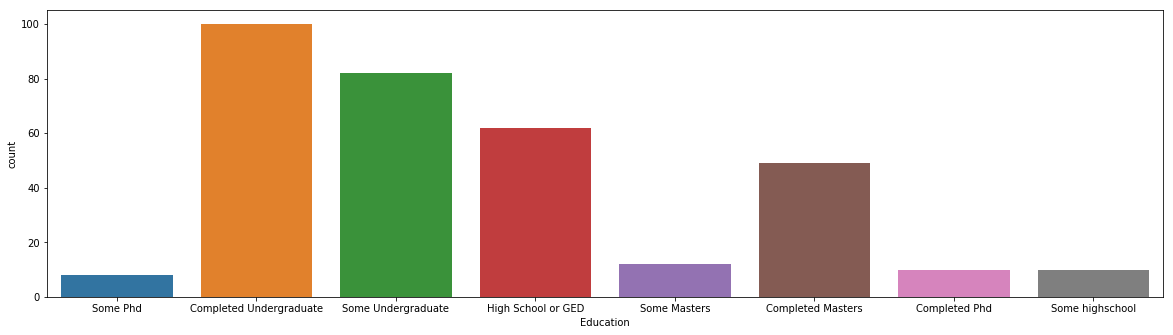

In [13]:
a4_dims = (20, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.Education)
#sns.countplot(ill)

In [14]:
edu = df.Education.to_frame().to_records()

In [15]:
df.columns

Index(['I am currently employed at least part-time', 'MentallyIll',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total length of any gaps in my resume in months.', 'Income',
       'Unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive thinking',
       'Mood swings', 'Panic attacks', 'Compulsive behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type'],
      dtype='object')

In [16]:
mental = df.MentallyIll.to_frame().to_records()
income = df.Income.to_frame().to_records()
unemployed = df.Unemployed.to_frame().to_records()
gender = df.Gender.to_frame().to_records()
age = df.Age.to_frame().to_records()

In [17]:
sixty, fifty, thirty, twenty = [], [], [], []
for i in age:
    if i[1] == '> 60':
        sixty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '45-60':
        fifty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '30-44':
        thirty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
    elif i[1] == '18-29':
        twenty.append((i[0], income[i[0]-1][1], unemployed[i[0]-1][1]))
        

In [18]:
age_list = [sixty, fifty, thirty, twenty]
title_age_list = ['Sixties', 'Fifties', 'Thirties', 'Twenties']
j = 0;
for i in age_list:
    #sort by income
    x_val = sorted([x[1] for x in i])
    unemp = [x[2] for x in i]

    #convert income to integers
    x_int = []
    for i in x_val:
        x_int.append(int(i))

    #Removing plots to reduce kernel size
    #a4_dims = (20, 4)
    #fig, ax = plt.subplots(figsize=a4_dims)
    #g = sns.scatterplot(x = x_int, y=unemp)
    #ax.set(xlabel='Income', ylabel='Unemployed')
    #plt.title(title_age_list[j])
    print(title_age_list[j], '-- Percent Unemployed:', sum(unemp)/len(unemp))
    j = j+1

Sixties -- Percent Unemployed: 0.325
Fifties -- Percent Unemployed: 0.18181818181818182
Thirties -- Percent Unemployed: 0.24509803921568626
Twenties -- Percent Unemployed: 0.3076923076923077


In [19]:
#separate and regroup data based on education level
completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters = [], [], [], [],[], [], [], [] 
for i in edu:
    if i[1] == 'Completed Masters':
        completed_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Undergraduate':
        completed_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'High School or GED':
        high_school.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Phd':
        some_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Completed Phd':
        completed_Phd.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some highschool':
        some_highschool.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    elif i[1] == 'Some Undergraduate':
        some_undergrad.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))
    else:
        some_masters.append((i[0], mental[i[0]-1][1], income[i[0]-1][1], unemployed[i[0]-1][1], gender[i[0]-1][1], age[i[0]-1][1]))

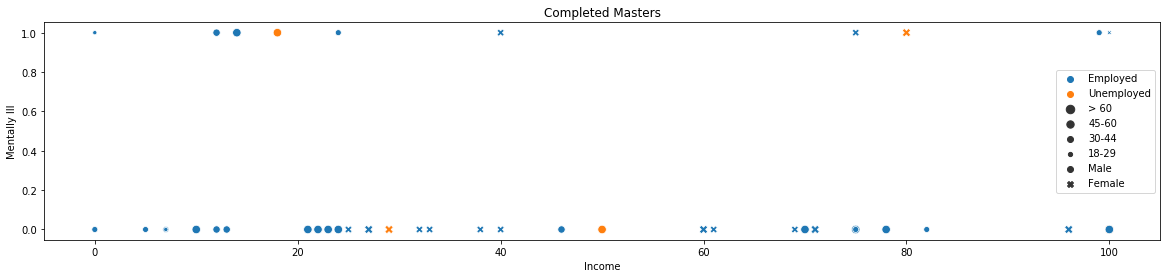

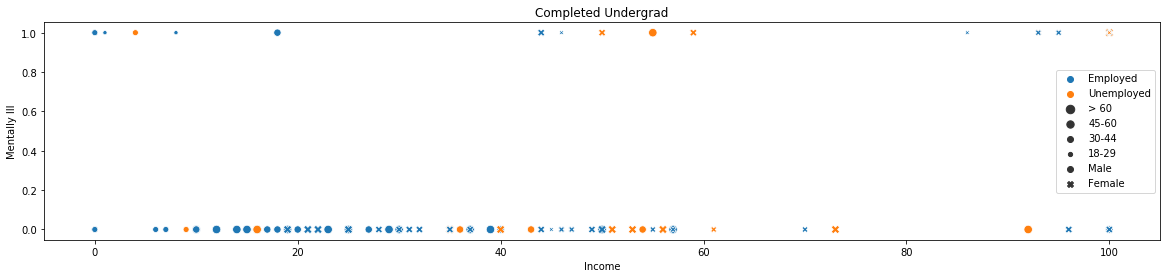

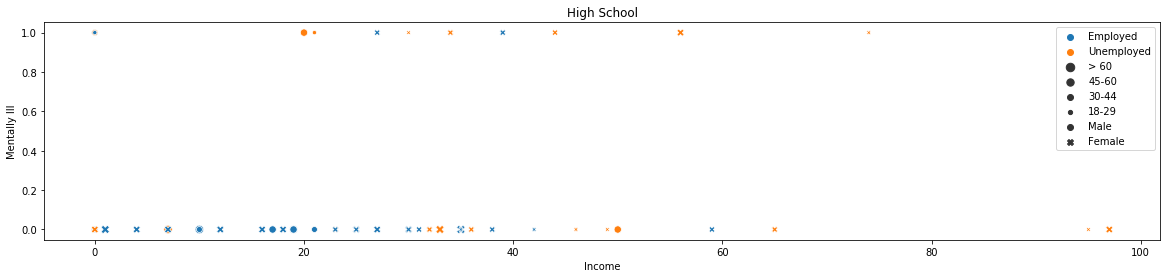

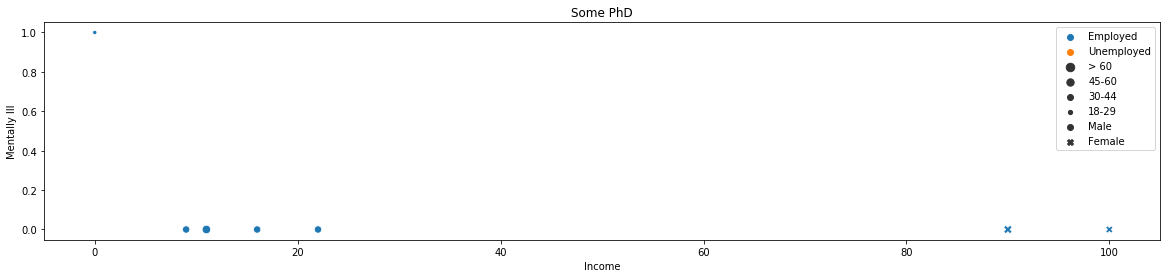

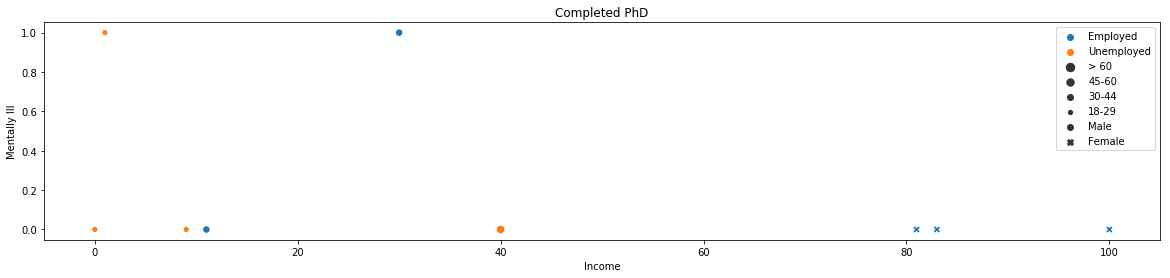

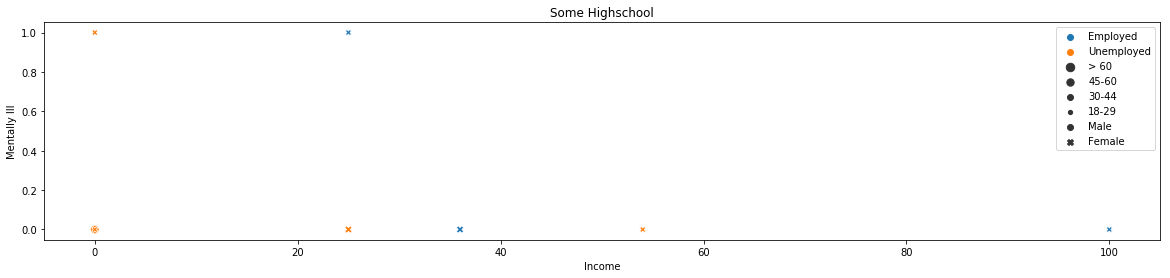

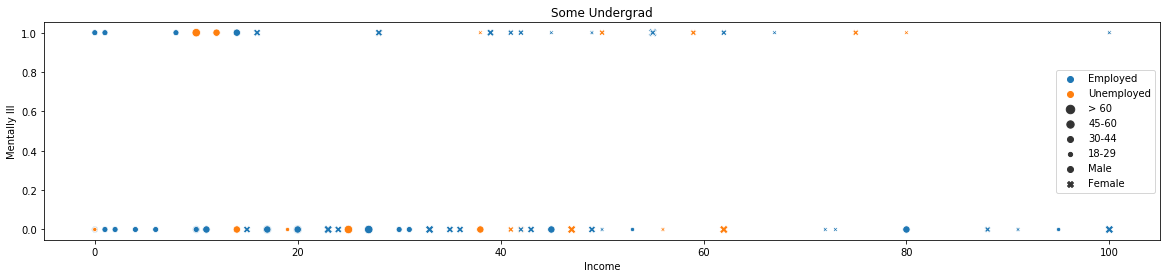

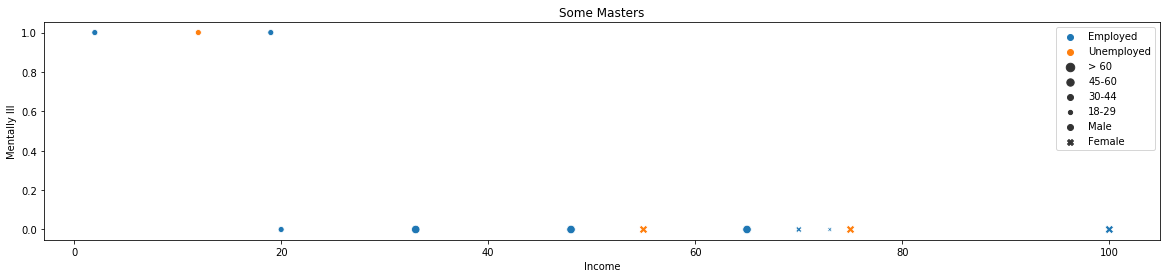

In [20]:
#Plot data, different graphs for different education levels
tot_list = [completed_masters, completed_undergrad, high_school, some_Phd, completed_Phd, some_highschool, some_undergrad, some_masters]
title_list = ['Completed Masters', 'Completed Undergrad', 'High School', 'Some PhD', 'Completed PhD', 'Some Highschool', 'Some Undergrad', 'Some Masters']
j = 0;
for i in tot_list:
    #sort by income
    x_val = sorted([x[2] for x in i])
    y_val = [x[1] for x in i]
    unemp = [x[3] for x in i]
    gend = [x[4] for x in i]
    age = [x[5] for x in i]

    #convert income to integers
    x_int = []
    for i in x_val:
        x_int.append(int(i))

    #convert binary employment to text labels
    for i in range(len(unemp)):
        if unemp[i] == 1:
            unemp[i] = 'Unemployed'
        elif unemp[i] == 0:
            unemp[i] = 'Employed'

    a4_dims = (20, 4)
    fig, ax = plt.subplots(figsize=a4_dims)
    g = sns.scatterplot(x = x_int, y=y_val, 
                        hue=unemp, hue_order = ('Employed', 'Unemployed'), 
                        style=gend, 
                        size=age, size_order = ('> 60', '45-60', '30-44','18-29'))
    ax.set(xlabel='Income', ylabel='Mentally Ill')
    plt.title(title_list[j])
    j = j+1

__Begin Machine Learning Part__
- Clean Dataset: Change to binary representation, use median age, give numeric score for education level

In [21]:
#use new dataframe for ML part
df2 = df
#remove last 3 irrelevant columns
df2 = df2.iloc[:, :-3]
#replace issues with binary representations
df2 = df2.replace(['Lack of concentration','Anxiety', 'Depression', 
                   'Obsessive thinking', 'Panic attacks', 'Compulsive behavior', 
                   'Mood swings', 'Tiredness'], 1)
#replace gender -> Male = 1, Female = 0
df2 = df2.replace(to_replace=['Female', 'Male'], value=[0, 1])
#replace age with median
df2 = df2.replace(to_replace=['> 60', '45-60', '30-44','18-29'], value=[65, 52, 37, 23])
#replace education with ranking, 0 is lowest educated 7 is highest
df2 = df2.replace(to_replace=['Completed Phd', 'Some Phd', 'Completed Masters','Some\xa0Masters', 
                              'Completed Undergraduate', 'Some Undergraduate', 'High School or GED', 'Some highschool']
                              , value=[7, 6, 5, 4, 3, 2, 1, 0])

In [22]:
#Fully cleaned data
df2.head(5)

,I am currently employed at least part-time,MentallyIll,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Income,Unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender
1,1,1,6,1,0,0.0,0,1,0,0,1,22,0,1,0,0,0,0,1.0,1,1,0.0,0.0,1.0,0.0,1.0,23,1
2,1,0,3,1,0,0.0,0,1,0,0,0,100,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
3,0,0,2,1,0,0.0,0,1,1,1,11,0,1,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1
4,1,1,3,1,1,35.0,1,1,0,1,33,32,0,1,30,0,0,4,1.0,1,1,1.0,1.0,1.0,1.0,1.0,37,1
5,1,0,1,1,0,0.0,0,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,37,1


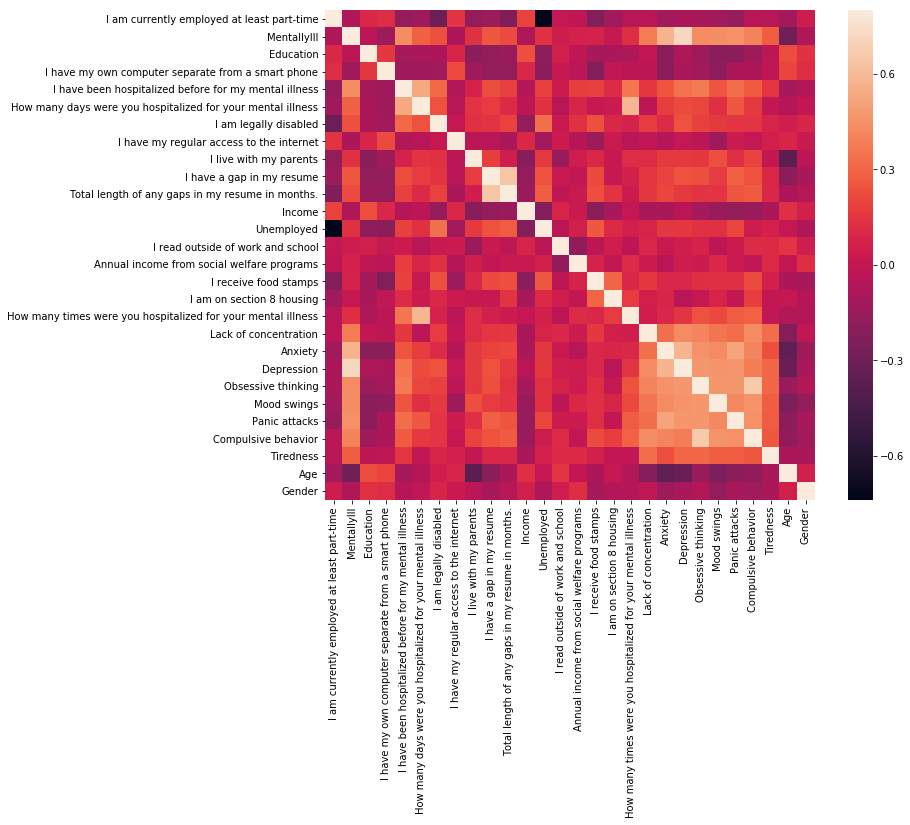

In [23]:
#Covariance Matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Strong negative correlation between obvious features of unemployed and currently employed at least part time. Strong positive correlation between depression and mentally ill, obsessive and compulive, panic attacks and anxiety.

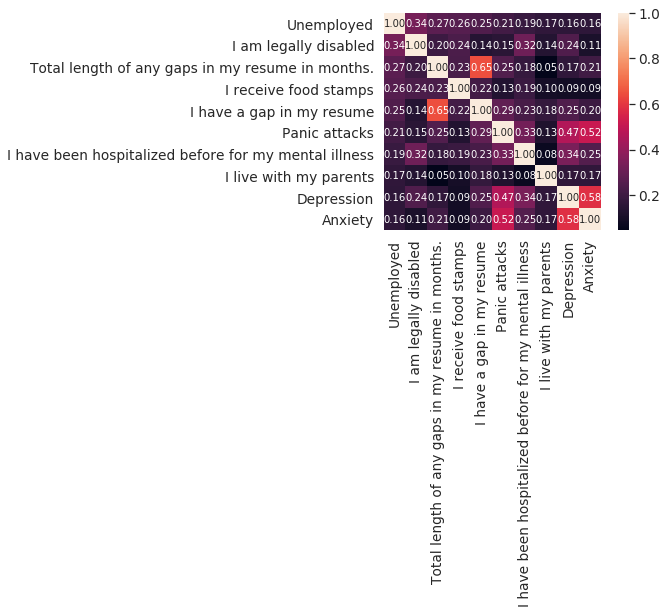

In [24]:
#Unemployed correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Unemployed')['Unemployed'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

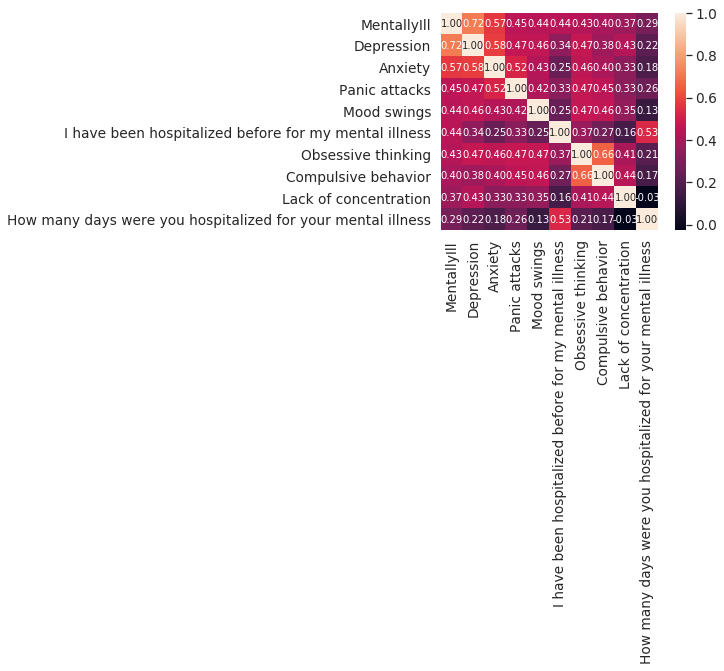

In [25]:
#MentallyIll correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'MentallyIll')['MentallyIll'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
#Begin Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#set target and drop from data
df3 = df2.copy()
df4 = df2.copy()
df5 = df2.copy()
target=df2['MentallyIll']
df2.drop(['MentallyIll'],axis=1,inplace=True)

In [27]:
X = df2
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest = RandomForestClassifier(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
print(forest.score(X_test,y_test))
#print(forest.score(X_train, y_train))

0.8805970149253731


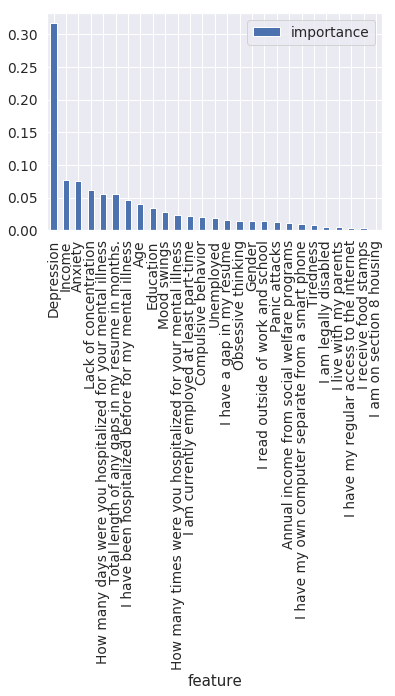

In [29]:
#Important Features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [30]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[184,  16],
       [ 21,  45]])

In [31]:
#183 correctly classified as not mentally ill, 19 wrongly classified as not mentally ill
#26 people wrongly classified as mentally ill, 39 correctly classified as mentally ill

In [32]:
#Recall and Precision
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

from sklearn.metrics import f1_score
f1_score(y_train, predictions)

Precision: 0.7377049180327869
Recall: 0.6818181818181818


0.7086614173228346

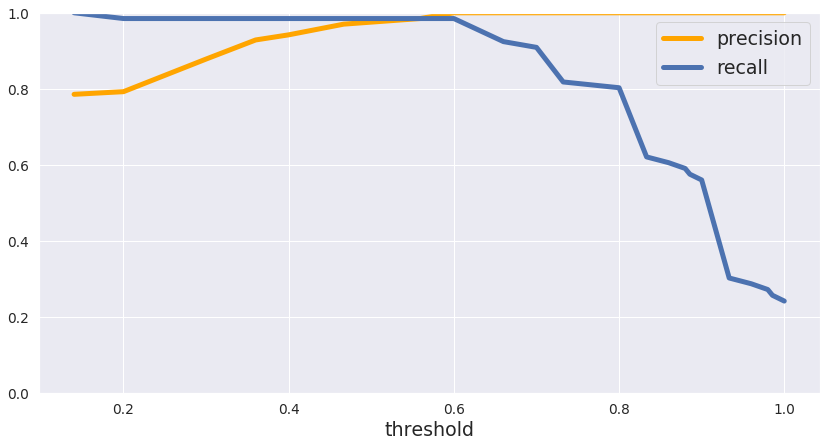

In [33]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

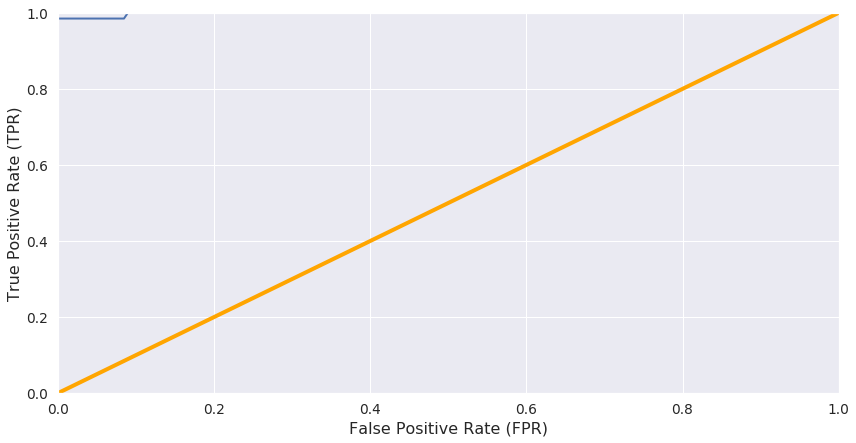

In [34]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9986742424242424


__Removing Clear Mental Health Conditions from Data__
- Days hospitalized, symptoms, etc

In [36]:
#dropping said columns, leaving tiredness and lack of concentration
#df3.drop(['I have been hospitalized before for my mental illness'],axis=1,inplace=True)
#df3.drop(['How many days were you hospitalized for your mental illness'],axis=1,inplace=True)
#df3.drop(['I am legally disabled'],axis=1,inplace=True)
#df3.drop(['How many times were you hospitalized for your mental illness'],axis=1,inplace=True)
#df3.drop(['depression'],axis=1,inplace=True)
#df3.drop(['anxiety'],axis=1,inplace=True)
#df3.drop(['Obsessive'],axis=1,inplace=True)
#df3.drop(['panic attack'],axis=1,inplace=True)
#df3.drop(['mood swings'],axis=1,inplace=True)
#df3.drop(['compulsive'],axis=1,inplace=True)

In [37]:
#df3.head(5)

In [38]:
target=df3['MentallyIll']
df3.drop(['MentallyIll'],axis=1,inplace=True)

In [39]:
X = df3
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest3 = RandomForestClassifier(max_depth=5, random_state=0)
forest3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
print(forest3.score(X_test,y_test))
#print(forest.score(X_train, y_train))

0.8955223880597015


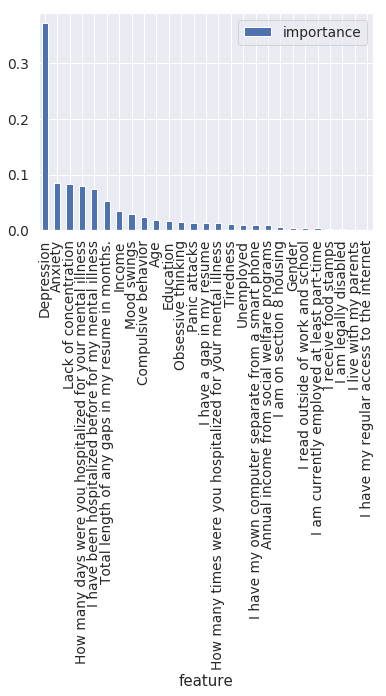

In [41]:
#Important Features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest3.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [42]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(forest3, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[184,  16],
       [ 21,  45]])

In [43]:
from sklearn.metrics import roc_auc_score
y_scores = forest3.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9861363636363636


**Modifying Task to Predict Unemployment Based on Mental Illness and Symptoms**


In [44]:
#Drop income and current employment features
#df4.drop(['Income'],axis=1,inplace=True)
#df4.drop(['I am currently employed at least part-time'],axis=1,inplace=True)
#df4.drop(['Annual income from social welfare programs'],axis=1,inplace=True)
#df4.drop(['I receive food stamps'],axis=1,inplace=True)
#target=df4['Unemployed']
#df4.drop(['Unemployed'],axis=1,inplace=True)
#df4.head(5)

In [45]:
X = df4
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest4 = RandomForestClassifier(max_depth=15, random_state=0)
forest4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
#Accuracy
print(forest4.score(X_test,y_test))

1.0


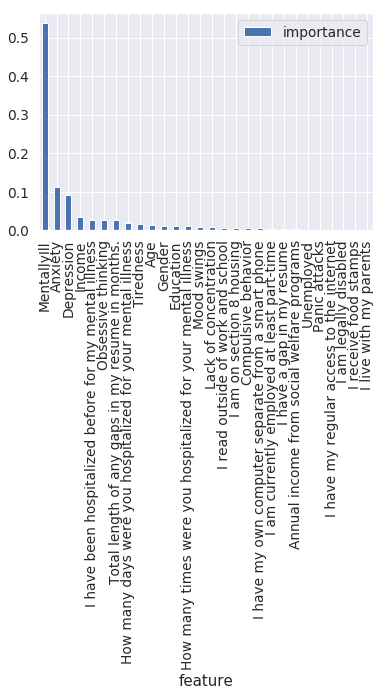

In [47]:
#Important Features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest4.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [48]:
from sklearn.metrics import roc_auc_score
y_scores = forest4.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


**Removing all Non-mental health related features to predict Unemployment**


In [49]:
#Drop all non mental health features
df5.drop(['Income'],axis=1,inplace=True)
df5.drop(['I am currently employed at least part-time'],axis=1,inplace=True)
df5.drop(['Annual income from social welfare programs'],axis=1,inplace=True)
df5.drop(['I receive food stamps'],axis=1,inplace=True)
df5.drop(['Education'],axis=1,inplace=True)
df5.drop(['I have my own computer separate from a smart phone'],axis=1,inplace=True)
df5.drop(['I am legally disabled'],axis=1,inplace=True)
df5.drop(['I have my regular access to the internet'],axis=1,inplace=True)
df5.drop(['I live with my parents'],axis=1,inplace=True)
df5.drop(['I have a gap in my resume'],axis=1,inplace=True)
#df5.drop(['Total length of any gaps in my resume in months.'],axis=1,inplace=True)
df5.drop(df5.columns[3], axis=1, inplace=True)
df5.drop(['I read outside of work and school'],axis=1,inplace=True)
df5.drop(['I am on section 8 housing'],axis=1,inplace=True)
df5.drop(['Age'],axis=1,inplace=True)
df5.drop(['Gender'],axis=1,inplace=True)

target=df5['Unemployed']
df5.drop(['Unemployed'],axis=1,inplace=True)
#df5.head(5)

In [50]:
X = df5
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)
forest5 = RandomForestClassifier(max_depth=15, random_state=0)
forest5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [51]:
#Accuracy
print(forest5.score(X_test,y_test))

0.7313432835820896


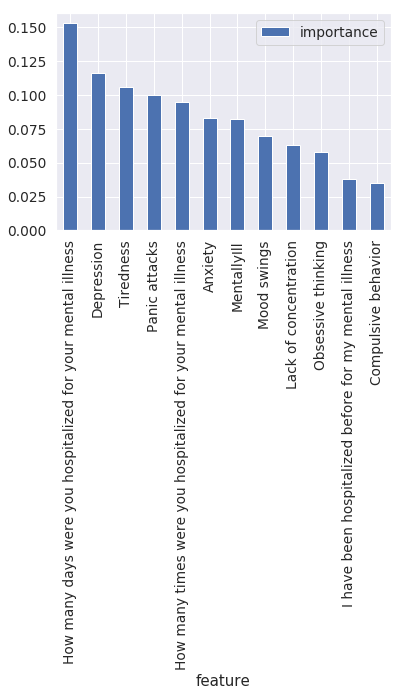

In [52]:
#Important Features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest5.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [53]:
from sklearn.metrics import roc_auc_score
y_scores = forest5.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8104171264621496


__Conclusion__

Without obvious indicators for mental illness such as hospital days and clear conditions, random forest with max_depth of 5 achieved 82% accuracy with a ROC-AUC of 0.9899. The clearest indicators of mental illness are income, education, gaps in resume, age, tiredness, lack of concentration. 

With clear indicators such as depression, anxiety, etc, random forest with max_depth of 10 achieved 94% accuracy and ROC-AUC of 0.997. Depression, anxiety, hospitalized days, and education were the most important features. 

As a predictor for unemployment, mental health considerations did play a significant role. Removing features such as current employment status and income, random forest with max_depth of 15 achieved 82% accuracy and ROC-AUC of 0.98. Gaps in resume, education, age, legal disability status, education, and gender were the most significant features.

Finally, removing all non-mental health related features to get a predictor for unemployment based solely on mental health indicators, random forest with max_depth of 15 achieved 83% accuracy and ROC-AUC of 0.80. The most important features were days/times hospitalized, panic attacks, and tiredness in that order. Depression and mood swings, and having a mental illness are more relevant features. 

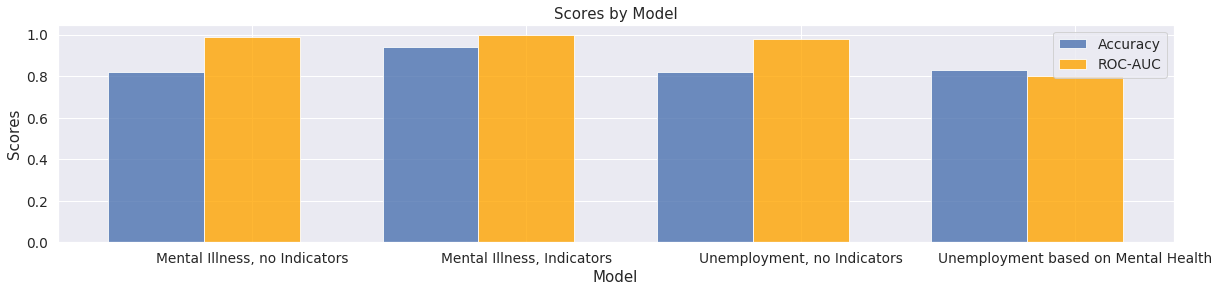

<Figure size 2160x504 with 0 Axes>

In [54]:
# data to plot
n_groups = 4
accuracy = (0.82, 0.94, 0.82, 0.83)
auc_roc = (0.9899, 0.997, 0.98, 0.80)
 
# create plot
a4_dims = (20, 4)
fig, ax = plt.subplots(figsize=a4_dims)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, accuracy, bar_width,
alpha=opacity,
color='b',
label='Accuracy')
 
rects2 = plt.bar(index + bar_width, auc_roc, bar_width,
alpha=opacity,
color='orange',
label='ROC-AUC')
 
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Scores by Model')
plt.xticks(index + bar_width, ('Mental Illness, no Indicators', 'Mental Illness, Indicators', 
                               'Unemployment, no Indicators', 'Unemployment based on Mental Health'))
plt.legend()
plt.figure(figsize=(30, 7))
plt.show()